In [1]:
# Module Imports
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [2]:
cluster = LocalCluster() 
cluster.scale(8) 

# Sets the number of workers 
cluster.adapt(minimum=1, maximum=8) 

# Allows the cluster to auto scale to 10 when tasks are computed 
client = Client(cluster)

C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\portfolio-oVyD_NMl-py3.9\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56112 instead
  warnings.warn(


In [3]:
defined_dtypes = {'id': str, 'title': str, 'comments':  str, 'journal-ref':  str, 'journal-ref_cleaned':  str,
                  'categories':  str, 'categories_original':str, "journal-ref_original":str,
                  'feild':str, 'category':str, 'sub_category':str, 'first_category':str}

ddf = dd.read_csv("without_covid_cleaned.csv", blocksize="256 MiB", dtype=defined_dtypes)

ddf_relevant = ddf[['journal-ref_cleaned', 'feild', 'category', 'sub_category']]

In [4]:
df = ddf_relevant.compute()

2023-05-21 11:42:20,029 - tornado.application - ERROR - Exception in callback functools.partial(<function TCPServer._handle_connection.<locals>.<lambda> at 0x0000024180E8A700>, <Task finished name='Task-2381' coro=<BaseTCPListener._handle_stream() done, defined at C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\portfolio-oVyD_NMl-py3.9\lib\site-packages\distributed\comm\tcp.py:605> exception=ValueError('invalid operation on non-started TCPListener')>)
Traceback (most recent call last):
  File "C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\portfolio-oVyD_NMl-py3.9\lib\site-packages\tornado\ioloop.py", line 738, in _run_callback
    ret = callback()
  File "C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\portfolio-oVyD_NMl-py3.9\lib\site-packages\tornado\tcpserver.py", line 387, in <lambda>
    gen.convert_yielded(future), lambda f: f.result()
  File "C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\portfolio-oVyD_NMl-py3.9\lib\site-packages\distributed\comm\tcp.

In [9]:
df.head(30)

,journal-ref_cleaned,feild,category,sub_category
0,physics.review,physics,hep-ph,NaN
1,NaN,math,math,co
2,NaN,physics,physics,gen-ph
3,NaN,math,math,co
4,NaN,physics,cond-mat,mes-hall
5,physics.review,physics,gr-qc,NaN
6,journal.of.applied.physics,physics,cond-mat,mtrl-sci
7,NaN,math,math,co
8,NaN,math,math,nt
9,NaN,math,math,ca


In [92]:
rainbow_big = ['red', 'orange', 'gold', 'yellow','palegreen', 'green', 'greenyellow', 'blue', 'skyblue', 
               'pink', 'plum', 'purple', 'peru']

rainbow_mid = ['red', 'gold', 'palegreen', 'green', 'blue', 'skyblue', 'pink',  'purple']

# Proportion of missing values per field

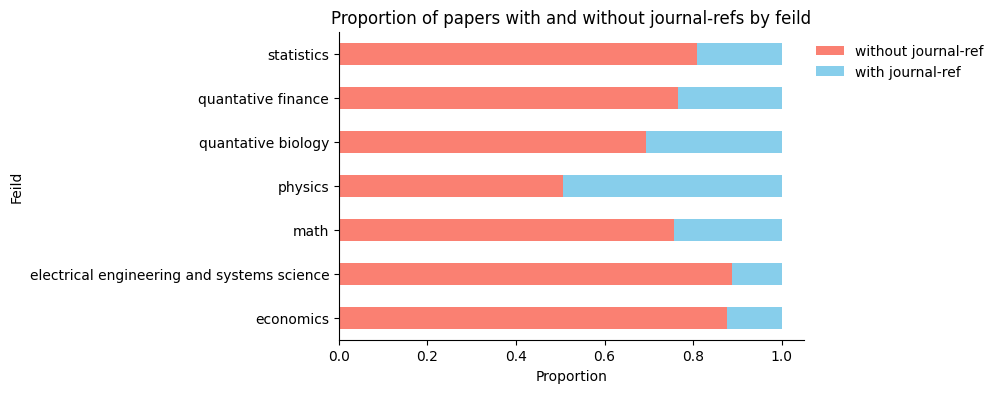

In [61]:
# Get value counts for each feild
df['has_journal_ref'] = pd.notnull(df['journal-ref_cleaned'])
nan_count_by_group = df.groupby('feild')['has_journal_ref'].value_counts(normalize=True)
nan_count_by_group_unstacked = nan_count_by_group.unstack()

# Plot stacked bar chart
ax = nan_count_by_group_unstacked.plot(kind='barh', stacked=True, color=['salmon', 'skyblue'], figsize=(6, 4))
ax.legend(bbox_to_anchor=(1, 1), frameon=False, labels=[ 'without journal-ref', 'with journal-ref',])
ax.set_xlabel('Proportion')
ax.set_ylabel('Feild')
ax.set_title('Proportion of papers with and without journal-refs by feild')
ax.spines[['right', 'top']].set_visible(False)

plt.show()

# journals split up by feild

In [75]:
top_journals = df['journal-ref_cleaned'].value_counts()[:50].index.to_list()
top_journals

['physics.review',
 'physics.lett',
 'jhep',
 'nucl.physics',
 'astrophys.journal.of',
 'astronomy.and.astrophysics',
 'eur.physics.journal.of',
 'mon.not.roy.astron.soc',
 'int.journal.of.mod.physics',
 'journal.of.physics',
 'jcap',
 'class.quant.grav',
 'nucl.physics.proc.suppl',
 'mod.physics.lett',
 'astron.astrophys',
 'new.journal.of.physics',
 'physica',
 'journal.of.math.physics',
 'apj',
 'astrophys.journal.of.l',
 'mnras',
 'journal.of.physics.math.theor',
 'eptcs',
 'aip.conf.proc',
 'journal.of.chem.physics',
 'appl.physics.lett',
 'journal.of.physics.soc.jpn',
 'journal.of.physics.condens.matter',
 'journal.of.stat.mech',
 'journal.of.physics.conf.ser',
 'physics.letters',
 'commun.math.physics',
 'europhys.lett',
 'astron.journal.of',
 'epl',
 'prog.theor.physics',
 'gen.rel.grav',
 'algebr.geom.topol',
 'class.quantum.grav',
 'nucl.instrum.meth',
 'scientific.reports',
 'acta.physics.polon',
 'annals.of.statistics',
 'journal.of.algebra',
 'nature.communications',
 'nat

In [103]:
grouped = df.groupby(['journal-ref_cleaned'])['feild'].value_counts()
grouped_df = grouped.unstack(level=1)
grouped_df

feild,economics,electrical engineering and systems science,math,physics,quantative biology,quantative finance,statistics
journal-ref_cleaned,,,,,,,
a.a,NaN,NaN,1.0,NaN,NaN,NaN,NaN
a.andreev.and.s.kuz.menkov.int.journal.of.mod.physics,NaN,NaN,NaN,1.0,NaN,NaN,NaN
a.barbosa.pra,NaN,NaN,NaN,1.0,NaN,NaN,NaN
a.barger.et.al.apj,NaN,NaN,NaN,1.0,NaN,NaN,NaN
a.bertlmann.and.zeilinger.eds.quantum.un.speakables.from.bell.to.quantum.information.springer,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
épijournal.de.géométrie.algébrique.march.epiga,NaN,NaN,7.0,NaN,NaN,NaN,NaN
épijournal.de.géométrie.algébrique.may.epiga,NaN,NaN,2.0,NaN,NaN,NaN,NaN
épijournal.de.géométrie.algébrique.november.epiga,NaN,NaN,8.0,NaN,NaN,NaN,NaN


2023-05-18 21:34:39,256 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:53128', name: 1, status: running, memory: 0, processing: 0>
2023-05-18 21:34:39,335 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:53128'.
Traceback (most recent call last):
  File "C:\Users\gv9\.pyenv\pyenv-win\versions\3.9.10\lib\multiprocessing\queues.py", line 247, in _feed
    send_bytes(obj)
  File "C:\Users\gv9\.pyenv\pyenv-win\versions\3.9.10\lib\multiprocessing\connection.py", line 205, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "C:\Users\gv9\.pyenv\pyenv-win\versions\3.9.10\lib\multiprocessing\connection.py", line 285, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] The pipe is being closed


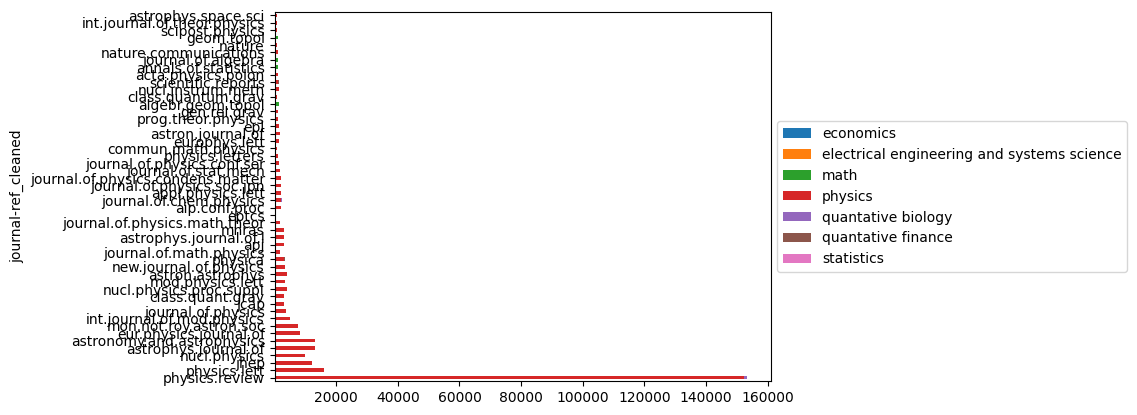

In [77]:
mini_grouped = grouped_df.loc[top_journals]
mini_grouped.plot.barh(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

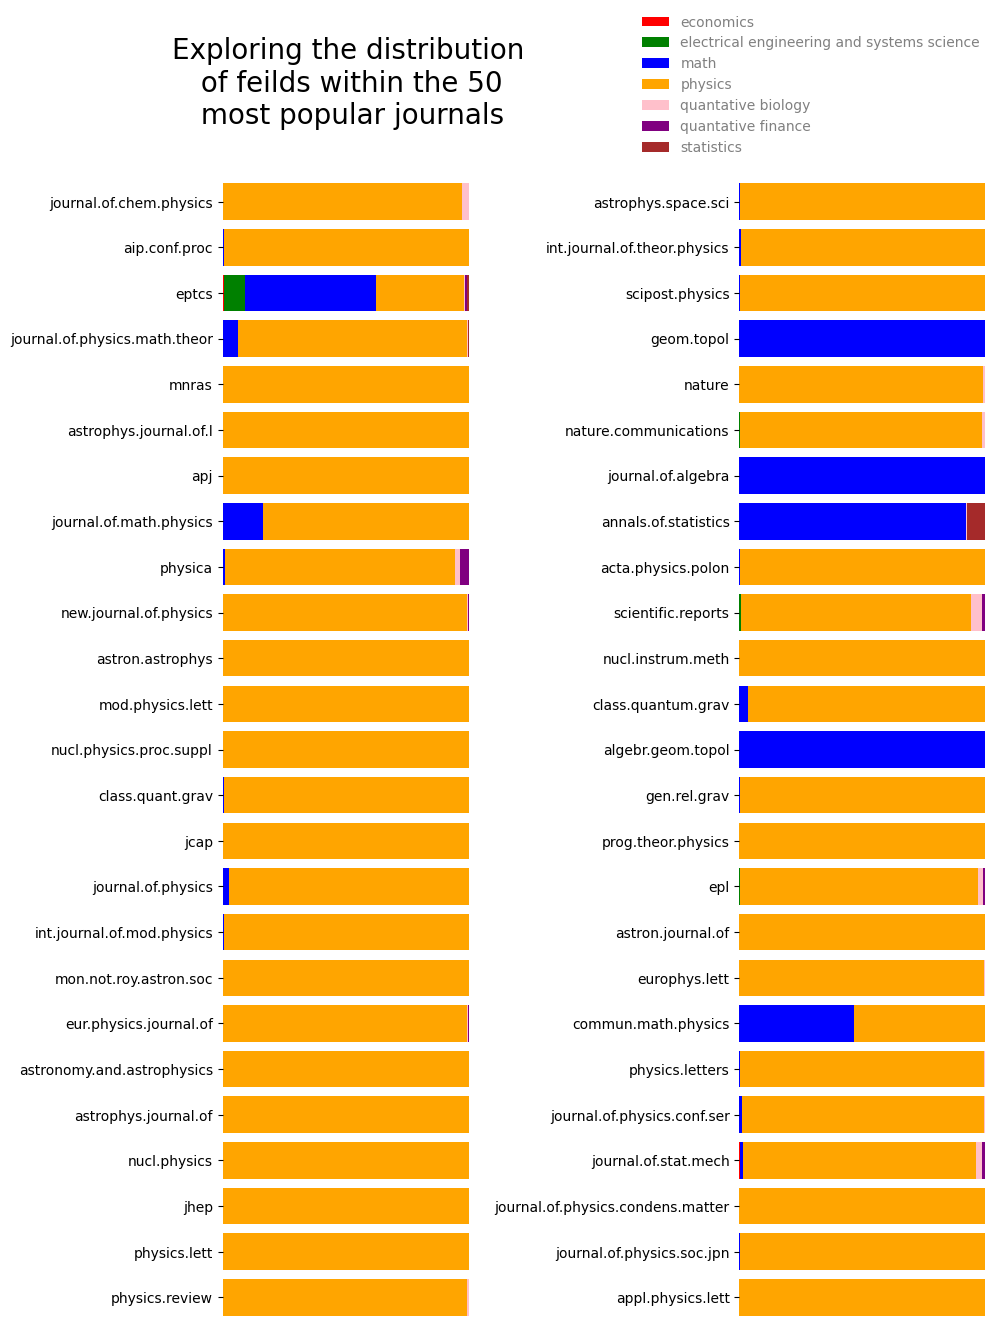

In [232]:
# Getting necersary data
grouped = df.groupby(['journal-ref_cleaned'])['feild'].value_counts()
grouped_df = grouped.unstack(level=1)

top_journals = df['journal-ref_cleaned'].value_counts()[:50].index.to_list()

grouped_top_50 = grouped_df.loc[top_journals]


# Calculate proportionality
df_prop = grouped_top_50.div(grouped_top_50.sum(axis=1), axis=0)

# Prepare figure for 2 axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
fig.subplots_adjust(wspace=1)
fig.suptitle('Exploring the distribution\n of feilds within the 50\n most popular journals', fontsize=20, x=0.25, y=0.97)

# plot LHS
df_prop[:25].plot.barh(stacked=True, width=0.8, color=['red', 'green', 'blue', 'orange', 'pink', 
                                                        'purple', 'brown', 'yellow'], ax=ax1, legend=False
# plot RHS                       
df_prop[25:].plot.barh(stacked=True, width=0.8, color=['red', 'green', 'blue', 'orange', 'pink', 
                                                        'purple', 'brown', 'yellow'], ax=ax2)


# Plot legend and make text grey
leg = plt.legend(loc=(-0.4, 1.01), frameon=False)
for text in leg.get_texts():
    text.set_color("gray")
    
# Remove unnecersary features
for ax in [ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.set_ylabel('')

plt.show()

# Failed Chi-Squared Test

In [58]:
df['category']

0                     hep-ph
1                       math
2                    physics
3                       math
4                   cond-mat
                 ...        
1714027    supr-con cond-mat
1714028    supr-con cond-mat
1714029    supr-con cond-mat
1714030    supr-con cond-mat
1714031    supr-con cond-mat
Name: category, Length: 1714032, dtype: object

https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/

In [101]:
df_top_jourals = df[df['journal-ref_cleaned'].isin(top_journals)]

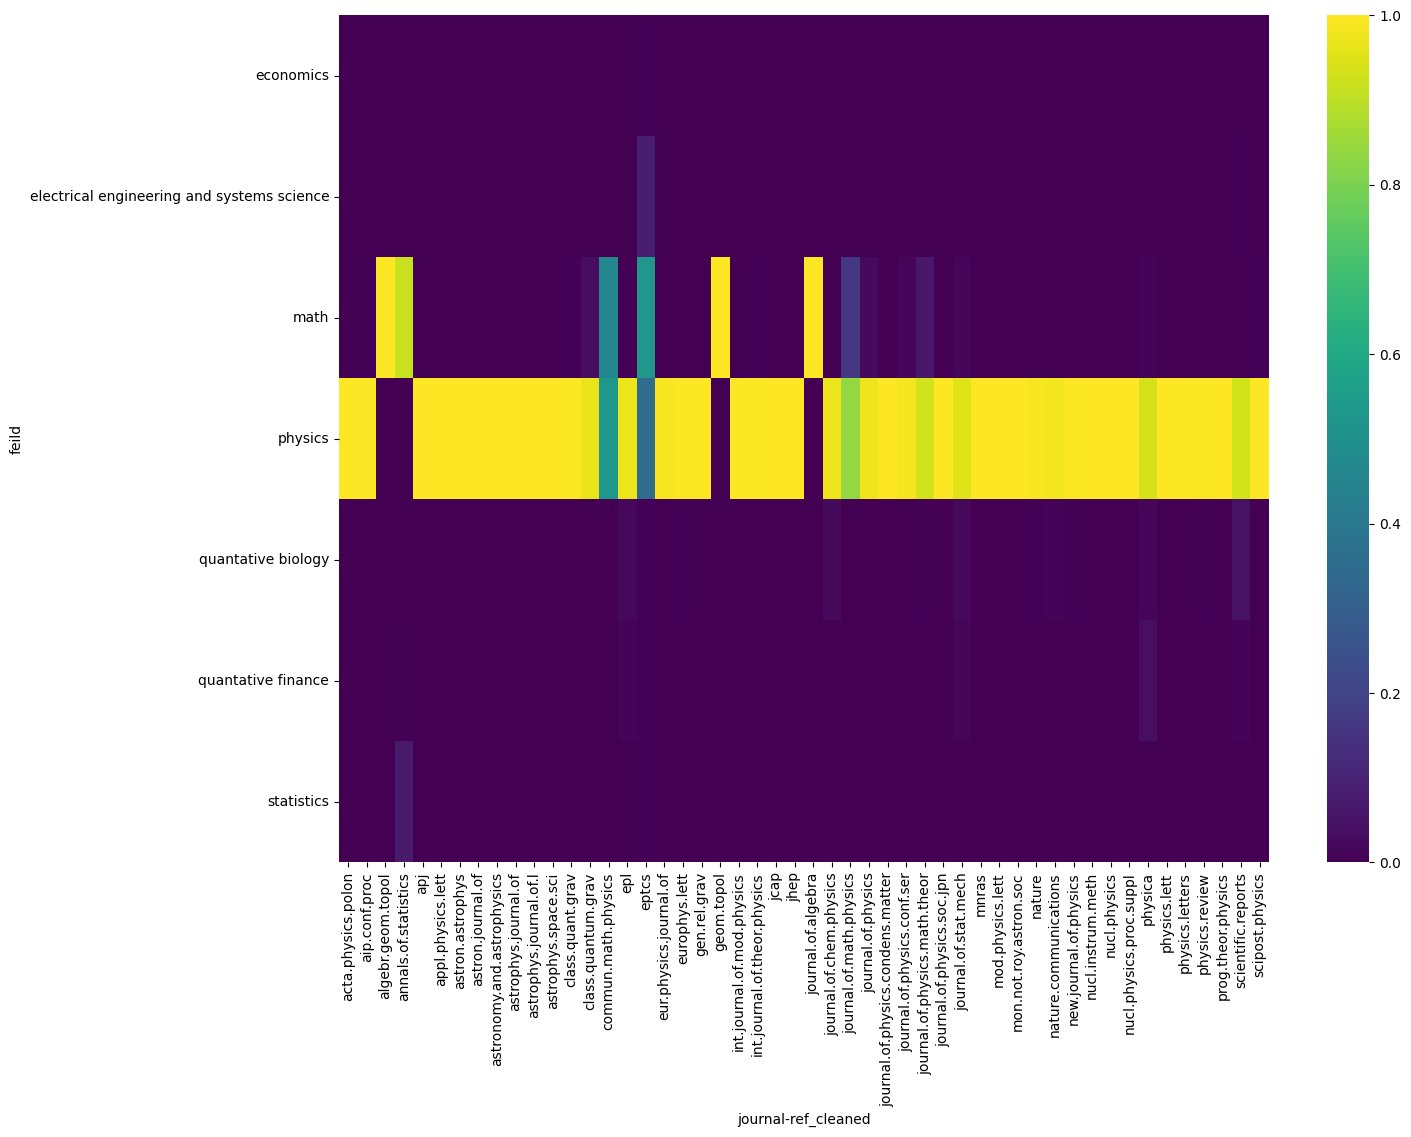

In [102]:
plt.figure(figsize = (15, 11))

CrosstabResult=pd.crosstab(index=df_top_jourals['feild'], columns=df_top_jourals['journal-ref_cleaned'], normalize='columns')

g = sns.heatmap(CrosstabResult, cmap='viridis')
           
plt.show()

In [73]:
from scipy.stats import chi2_contingency

CrosstabResult=pd.crosstab(index=df_top_jourals['feild'], columns=df_top_jourals['journal-ref_cleaned'], normalize='columns', )
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult, correction=True)
#print(ChiSqResult)
 
# P-Value is the Probability of H0 being True
# If P-Value<0.05 then only we Accept the assumption(H0)
# H0: The variables are not correlated with each other.
# H1: The variables are correlated with each other.

 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.0


In [74]:
from scipy.stats import chi2_contingency

CrosstabResult=pd.crosstab(index=df_top_jourals['sub_category'], columns=df_top_jourals['journal-ref_cleaned'], normalize='columns')
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult, correction=True)
 
# P-Value is the Probability of H0 being True
# If P-Value<0.05 then only we Accept the assumption(H0)
# H0: The variables are not correlated with each other.
# H1: The variables are correlated with each other.

 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.0


# Unique journal refs per category

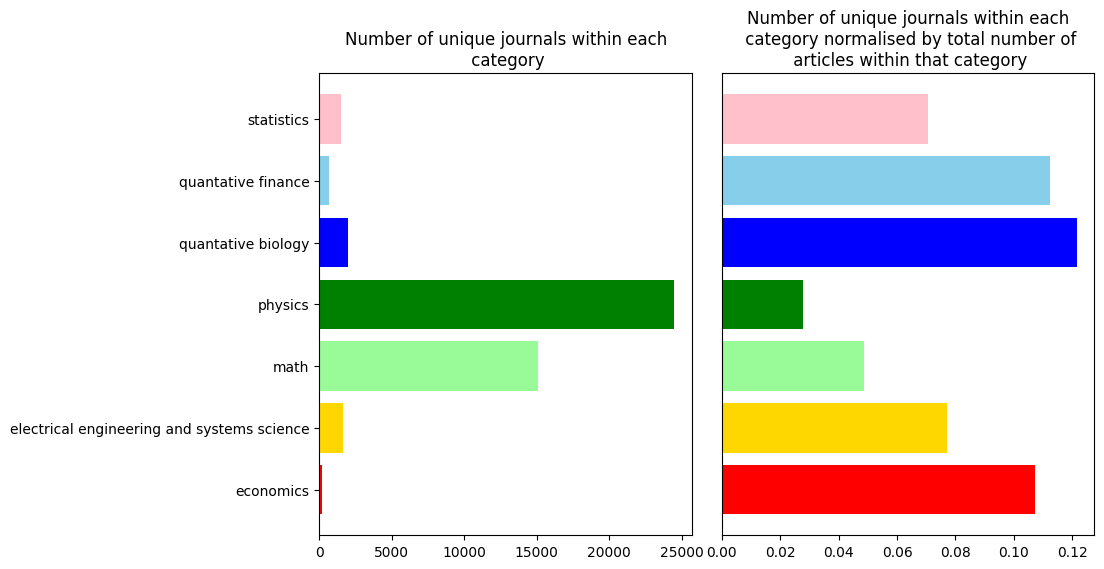

In [130]:
#Preparing figure to contain 2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0.08)

# Calculate values
n_unique_journals = df.groupby('feild')['journal-ref_cleaned'].nunique()
n_unique_journals_norm = df.groupby('feild')['journal-ref_cleaned'].nunique()/df.groupby('feild').size()

# Bar chat 1 (left)
ax1.barh(n_unique_journals.index, n_unique_journals, color=rainbow_mid)
ax1.set_title('Number of unique journals within each\n category')

# Bar chart 2 (right)
n_unique_journals = df.groupby('feild')['journal-ref_cleaned'].nunique()
ax2.barh(n_unique_journals_norm.index, n_unique_journals_norm, color=rainbow_mid)
ax2.set(yticklabels=[])
ax2.tick_params(left=False)
ax2.set_title('Number of unique journals within each\n category normalised by total number of\n
                articles within that category')

plt.show()

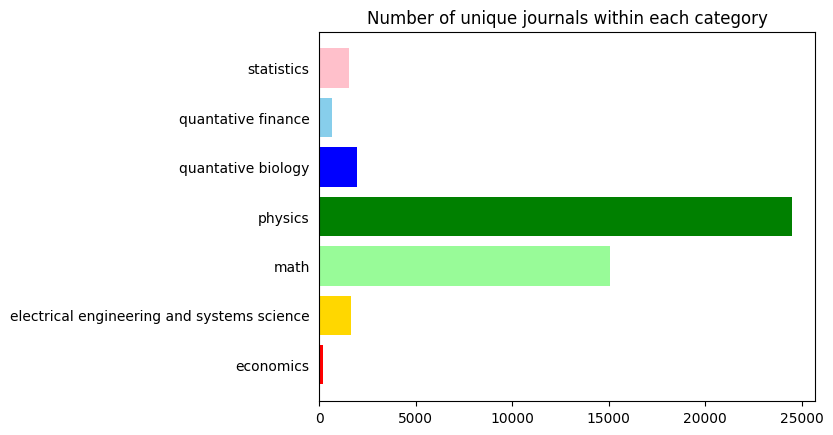

In [163]:
df_with_journal_ref = df[pd.notnull(df['journal-ref_cleaned'])]
field_counts = df_with_journal_ref.groupby('feild').size()
field_counts_dict = field_counts.to_dict()
field_counts_dict

{'economics': 227,
 'electrical engineering and systems science': 2435,
 'math': 75140,
 'physics': 432606,
 'quantative biology': 4972,
 'quantative finance': 1368,
 'statistics': 4108}

In [164]:
df_journal_per_feild = df.groupby('feild')['journal-ref_cleaned'].value_counts().groupby(level=0, group_keys=False).head(3)

In [165]:
df_top_3_per_feild = pd.DataFrame(df_journal_per_feild).reset_index().set_index('feild', drop=True).reset_index()
df_top_3_per_feild['perc (%)'] = df_top_3_per_feild.apply(lambda row: round((row['count']/field_counts_dict[row['feild']])*100, 1), axis=1)
df_top_3_per_feild

,feild,journal-ref_cleaned,count,perc (%)
0,economics,plos.one,5,2.2
1,economics,economic.theory,5,2.2
2,economics,entropy,4,1.8
3,electrical engineering and systems science,ieee.access,50,2.1
4,electrical engineering and systems science,ieee.transactions.on.signal.processing,23,0.9
5,electrical engineering and systems science,ieee.acm.transactions.on.audio.speech.and.lang...,19,0.8
6,math,algebr.geom.topol,1506,2.0
7,math,journal.of.algebra,1169,1.6
8,math,annals.of.statistics,1150,1.5
9,physics,physics.review,152291,35.2


In [141]:
df_top_3_per_feild.to_csv('top_3_journal_refs_per_feild.csv')

In [80]:
df_top_3_per_feild.apply(lambda row: print(row.index), axis=1)

Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='object')
Index(['journal-ref_cleaned', 'count'], dtype='o

feild
economics                                     None
economics                                     None
economics                                     None
electrical engineering and systems science    None
electrical engineering and systems science    None
electrical engineering and systems science    None
math                                          None
math                                          None
math                                          None
physics                                       None
physics                                       None
physics                                       None
quantative biology                            None
quantative biology                            None
quantative biology                            None
quantative finance                            None
quantative finance                            None
quantative finance                            None
statistics                                    None
statistics               

In [143]:
df['sub_category'].unique()

array([nan, 'co', 'gen-ph', 'mes-hall', 'mtrl-sci', 'nt', 'ca', 'pr',
       'ps', 'na', 'str-el', 'ra', 'optics', 'pe', 'qm', 'oa', 'qa',
       'stat-mech', 'cd', 'it', 'ne', 'ed-ph', 'dg', 'soft', 'fa', 'ag',
       'ds', 'soc-ph', 'mp', 'other', 'data-an', 'gr', 'supr-con', 'si',
       'ac', 'sg', 'cc', 'gt', 'cv', 'ap', 'rt', 'ot', 'plasm-ph',
       'bio-ph', 'cg', 'dm', 'flu-dyn', 'comp-ph', 'mg', 'atom-ph', 'st',
       'ao-ph', 'chem-ph', 'at', 'geo-ph', 'nc', 'rm', 'dis-nn', 'sc',
       'he', 'oc', 'cr', 'lo', 'class-ph', 'gn', 'me', 'cp', 'gm', 'kt',
       'atm-clus', 'acc-ph', 'sp', 'hist-ph', 'lg', 'ni', 'ho', 'ins-det',
       'oh', 'cb', 'bm', 'ao', 'ai', 'ir', 'ce', 'dc', 'cl', 'pop-ph',
       'mn', 'ct', 'med-ph', 'hc', 'dl', 'ms', 'ro', 'space-ph', 'db',
       'et', 'to', 'gl', 'ma', 'cy', 'pf', 'mm', 'pm', 'sr', 'ml', 'tr',
       'pl', 'sd', 'ar', 'se', 'quant-gas', 'os', 'ep', 'ga', 'im', 'sy',
       'fl', 'ec', 'mf', 'as', 'app-ph', 'th', 'iv', 'em'], dtype=

In [146]:
sug_cat_counts = df.groupby('sub_category').size()
sug_cat_counts_dict = sug_cat_counts.to_dict()
sug_cat_counts_dict

df_journal_per_sub_cat = df.groupby('sub_category')['journal-ref_cleaned'].value_counts().groupby(level=0, group_keys=False).head(1)

df_top_3_per_sub_cat = pd.DataFrame(df_journal_per_sub_cat).reset_index().set_index('sub_category', drop=True).reset_index()
df_top_3_per_sub_cat['perc (%)'] = df_top_3_per_sub_cat.apply(lambda row: round((row['count']/sug_cat_counts_dict[row['sub_category']])*100, 1), axis=1)
df_top_3_per_sub_cat

,sub_category,journal-ref_cleaned,count,perc (%)
0,ac,journal.of.algebra,124,2.2
1,acc-ph,physics.review,382,8.5
2,ag,compositio.math,224,0.8
3,ai,journal.of.artificial.intelligence.research,116,1.1
4,ao,physics.review,296,13.3
...,...,...,...,...
119,supr-con,physics.review,9308,35.6
120,sy,eptcs,51,0.6
121,th,economic.theory,3,0.8
122,to,physics.review,22,3.4


In [159]:
df_top_3_per_sub_cat.groupby('journal-ref_cleaned')['sub_category'].size()

journal-ref_cleaned
algebr.geom.topol                                                                                          2
algorithmica                                                                                               1
am.journal.of.physics                                                                                      1
amer.math.monthly                                                                                          1
ann.th                                                                                                     1
annals.of.applied.probability                                                                              2
annals.of.applied.statistics                                                                               1
annals.of.probability                                                                                      1
annals.of.statistics                                                                                       1

# Biology and finance relationship

In [ ]:
#ddf_relevant = ddf[['journal-ref_cleaned', 'feild', 'category', 'sub_category']]

In [84]:
# Get Data
grouped = df.groupby('journal-ref_cleaned')
journal_totals = grouped.size().rename('total')
category_percentages = grouped['feild'].value_counts().unstack()

In [85]:
category_percentages = category_percentages.drop('physics.review')

82


feild,quantative finance,quantative biology
feild,,
quantative finance,1.000000,0.535498
quantative biology,0.535498,1.000000


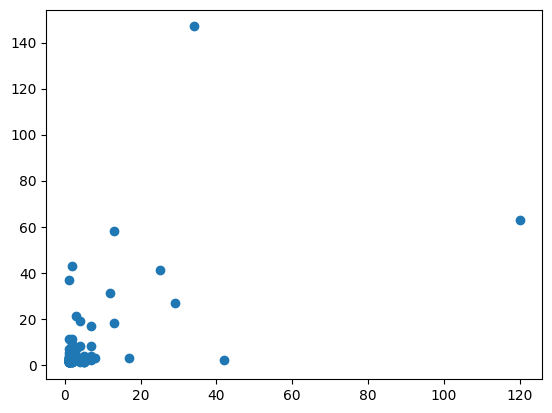

In [86]:
bio_fin = category_percentages[['quantative finance', 'quantative biology']]
bio_fin_relationship = bio_fin.dropna()
print(len(bio_fin_relationship))
plt.scatter(bio_fin_relationship['quantative finance'], 
            bio_fin_relationship['quantative biology'])

bio_fin_relationship.corr()

In [87]:
import itertools
column_combinations = list(itertools.combinations(category_percentages.columns, 2))

for column1, column2 in column_combinations:
    col_df = category_percentages[[column1, column2]]
    col_df_relationship = col_df.dropna()
    
    if len(col_df_relationship)<50:
        print(column1, column2, ':',len(col_df_relationship))

economics electrical engineering and systems science : 8
economics math : 25
economics physics : 32
economics quantative biology : 13
economics quantative finance : 30
economics statistics : 26
electrical engineering and systems science quantative finance : 30


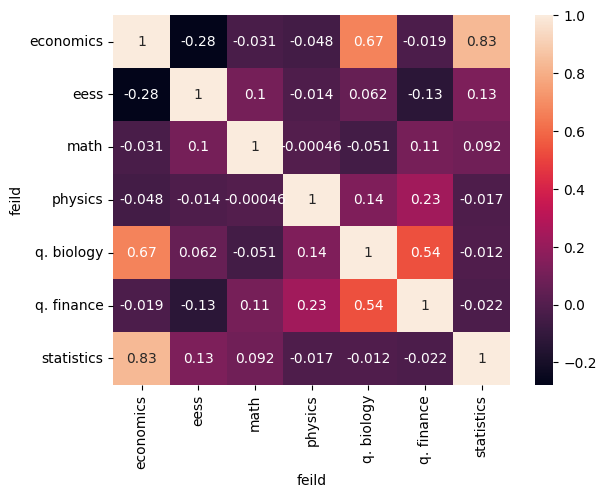

In [88]:
category_percentages = category_percentages.rename(columns={'electrical engineering and systems science': 'eess',
                                                           'quantative finance':'q. finance',
                                                           'quantative biology':'q. biology'})
field_correlation = category_percentages.corr()
sns.heatmap(field_correlation, annot=True)

plt.show()

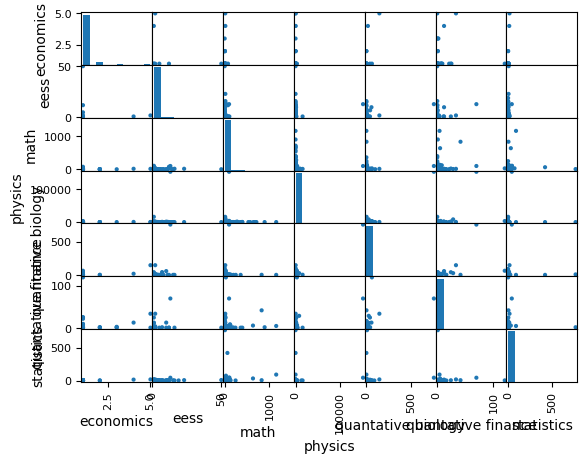

In [52]:
pd.plotting.scatter_matrix(category_percentages, alpha=1)
plt.show()

In [22]:
category_percentages.columns

Index(['economics', 'electrical engineering and systems science', 'math',
       'physics', 'quantative biology', 'quantative finance', 'statistics'],
      dtype='object', name='feild')

In [20]:
result = pd.concat([journal_totals, category_percentages], axis=1)
result

,total,economics,electrical engineering and systems science,math,physics,quantative biology,quantative finance,statistics
journal-ref_cleaned,,,,,,,,
aaai,60,NaN,0.500000,NaN,NaN,NaN,NaN,0.5
acs.nano,269,NaN,NaN,NaN,0.992565,0.007435,NaN,NaN
acs.photonics,175,NaN,0.018519,NaN,0.975309,0.006173,NaN,NaN
acta.appl.math,66,NaN,NaN,0.816327,0.183673,NaN,NaN,NaN
acta.arith,139,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
transformation.groups,105,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
turk.journal.of.physics,65,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
ukr.journal.of.physics,128,NaN,NaN,0.044444,0.922222,0.033333,NaN,NaN
